In [10]:
# Libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data prep
ames = pd.read_csv("https://assets.datacamp.com/production/course_3679/datasets/ames_housing_trimmed_processed.csv")
#ames = pd.read_csv("https://assets.datacamp.com/production/course_3679/datasets/ames_unprocessed_data.csv")
ames.iloc[1]

# Last col is our predictor
X, y =  ames.iloc[:,:-1], ames.iloc[:,-1]

In [11]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=12)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


In [12]:
X.iloc[1,:]

MSSubClass                20.0
LotFrontage               80.0
LotArea                 9600.0
OverallQual                6.0
OverallCond                8.0
YearBuilt               1976.0
Remodeled                  0.0
GrLivArea               1262.0
BsmtFullBath               0.0
BsmtHalfBath               1.0
FullBath                   2.0
HalfBath                   0.0
BedroomAbvGr               3.0
Fireplaces                 1.0
GarageArea               460.0
MSZoning_FV                0.0
MSZoning_RH                0.0
MSZoning_RL                1.0
MSZoning_RM                0.0
Neighborhood_Blueste       0.0
Neighborhood_BrDale        0.0
Neighborhood_BrkSide       0.0
Neighborhood_ClearCr       0.0
Neighborhood_CollgCr       0.0
Neighborhood_Crawfor       0.0
Neighborhood_Edwards       0.0
Neighborhood_Gilbert       0.0
Neighborhood_IDOTRR        0.0
Neighborhood_MeadowV       0.0
Neighborhood_Mitchel       0.0
Neighborhood_NAmes         0.0
Neighborhood_NPkVill       0.0
Neighbor

In [13]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 43566.535658


In [14]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))


   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0   142980.433594    1193.791602    141767.531250      429.454591
1   104891.394532    1223.158855    102832.544922      322.469930
2    79478.937500    1601.344539     75872.615235      266.475960
3    62411.920899    2220.150028     57245.652343      273.625086
4    51348.279297    2963.377719     44401.298828      316.423666
4    51348.279297
Name: test-rmse-mean, dtype: float64


In [15]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))


   test-mae-mean  test-mae-std  train-mae-mean  train-mae-std
0  127634.000000   2404.009898   127343.482421     668.308109
1   90122.501953   2107.912810    89770.056641     456.965267
2   64278.558594   1887.567576    63580.791016     263.404950
3   46819.168945   1459.818607    45633.155274     151.883420
4   35670.646484   1140.607452    33587.090820      86.999396
4    35670.646484
Name: test-mae-mean, dtype: float64


In [16]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,
                             params=params,
                             nfold=2,
                             num_boost_round=5,
                             metrics="rmse",
                             as_pandas=True,
                             seed=123)

    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))


Best rmse as a function of l2:
    l2          rmse
0    1  52275.357421
1   10  57746.064453
2  100  76624.625000


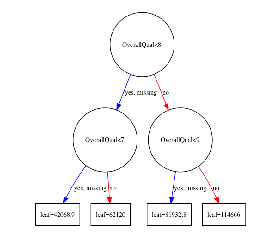

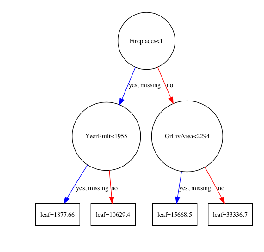

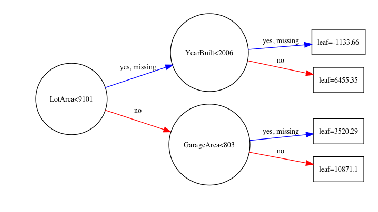

In [17]:
import graphviz
import matplotlib.pyplot as plt

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
plt.show()


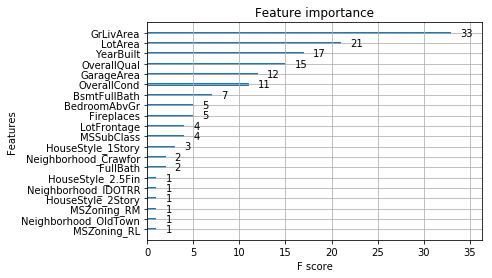

In [18]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()


I should plot these graphs in R - this makes it easier to understand what is going on...